In [94]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras

import matplotlib.pyplot as plt

import math

from time import time

%matplotlib inline

In [5]:
df = pd.read_csv("/data/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
features = ["SepalLengthCm", "PetalLengthCm"]

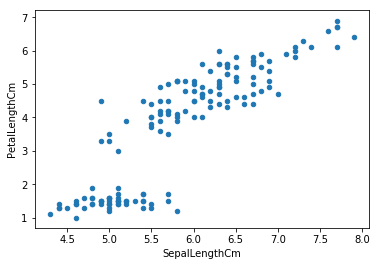

In [10]:
df.plot.scatter(features[0], features[1])

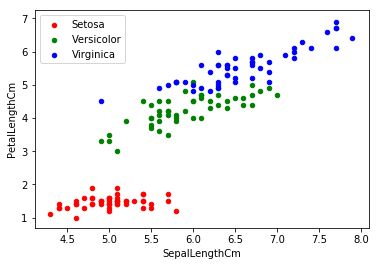

In [32]:
fig, ax = plt.subplots()

colors = ["red", "green", "blue"]
(df[df.Species == 'Iris-setosa']
        .plot.scatter(features[0], features[1]
                      , color = colors[0], ax = ax, label = "Setosa"))
(df[df.Species == 'Iris-versicolor']
        .plot.scatter(features[0], features[1]
                      , color = colors[1], ax = ax, label = "Versicolor"))
(df[df.Species == 'Iris-virginica']
        .plot.scatter(features[0], features[1]
                      , color = colors[2], ax = ax, label = "Virginica"))

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

X = StandardScaler().fit_transform(df[features].values) 
y = LabelEncoder().fit_transform(df.Species)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
y = np.where(df.Species == 'Iris-setosa', 1, 0 )

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 2), (45, 2), (105,), (45,))

In [27]:
from keras.layers import Dense, InputLayer

In [71]:
tf.set_random_seed(1)
np.random.seed(1)

model = keras.Sequential()
model.add(InputLayer((2, )))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy
            , metrics=["accuracy"], optimizer="adam")


In [72]:
model.fit(X_train, y_train, epochs=500, verbose=0)
model.evaluate(X_test, y_test)

45/45 [==============================] - 0s 797us/step


[0.2716937339968152, 0.9555555555555556]

In [73]:
y_test_pred = model.predict_classes(X_test).flatten()

In [74]:
y_test_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0], dtype=int32)

In [75]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix

(<matplotlib.figure.Figure at 0x1a2905ce80>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a290c7a90>)

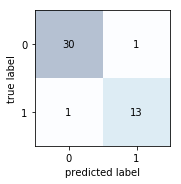

In [76]:
plot_confusion_matrix(confusion_matrix(y_test, y_test_pred))

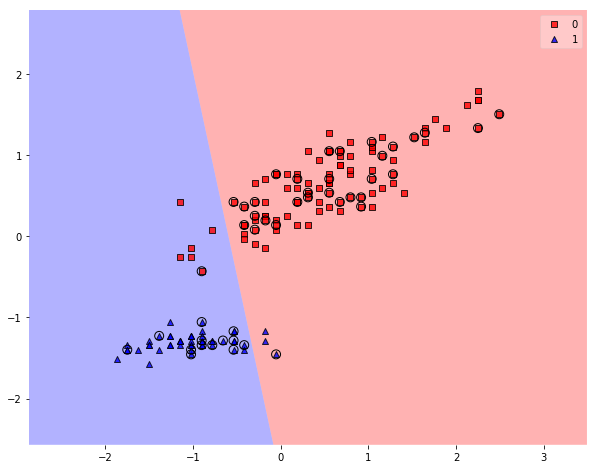

In [80]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X, y, model, X_highlight=X_test)

In [59]:
y_test_prob = model.predict(X_test).flatten()
y_test_prob

array([5.3878111e-01, 6.9264740e-01, 1.4052656e-02, 7.6432645e-01,
       1.0245703e-04, 2.5545925e-02, 3.8513257e-03, 8.2882899e-01,
       9.4667643e-01, 2.5409926e-03, 2.0018630e-01, 7.1062666e-01,
       1.2833005e-03, 2.2422764e-02, 6.3902564e-02, 9.8022079e-01,
       1.4290218e-01, 1.6886127e-01, 7.3836511e-01, 9.1187274e-01,
       2.2243549e-01, 2.5953266e-01, 7.0993383e-03, 9.0612286e-01,
       9.1175630e-04, 1.6962868e-01, 6.9727558e-01, 8.6476797e-01,
       4.3269265e-02, 2.0836581e-02, 4.6240751e-02, 2.1772597e-04,
       2.3567456e-01, 1.0562507e-02, 7.2009914e-02, 7.8753799e-01,
       2.7420110e-01, 8.3920681e-01, 1.6029103e-02, 4.0828623e-03,
       3.8304436e-03, 8.7269485e-01, 4.6000637e-02, 1.3827579e-02,
       1.2250642e-02], dtype=float32)

In [62]:
from sklearn.metrics import roc_curve, auc

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

In [63]:
auc(fpr, tpr)

0.9976958525345623

Text(0.5,1,'AUC: 0.997696')

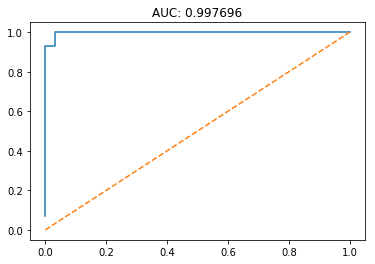

In [66]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], ls = "--")
plt.title("AUC: %f" % auc(fpr, tpr))

(<matplotlib.figure.Figure at 0x1a28eb19e8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a28fb5d30>)

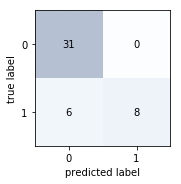

In [69]:
y_test_pred = np.where(y_test_prob > 0.8, 1, 0)
plot_confusion_matrix(confusion_matrix(y_test, y_test_pred))

In [102]:
y = np.where(df.Species == 'Iris-versicolor', 1, 0 )
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size = 0.3, random_state = 13456)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 2), (45, 2), (105,), (45,))

In [83]:
tf.set_random_seed(1)
np.random.seed(1)

model = keras.Sequential()
model.add(InputLayer((2, )))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy
            , metrics=["accuracy"], optimizer="adam")
model.fit(X_train, y_train, epochs=500, verbose=0)
print("test accuracy: ",  model.evaluate(X_test, y_test)[1])
plt.figure(figsize=(10, 8))
plot_decision_regions(X, y, model, X_highlight=X_test)

45/45 [==============================] - 0s 1ms/step
test accuracy:  0.6000000052981906


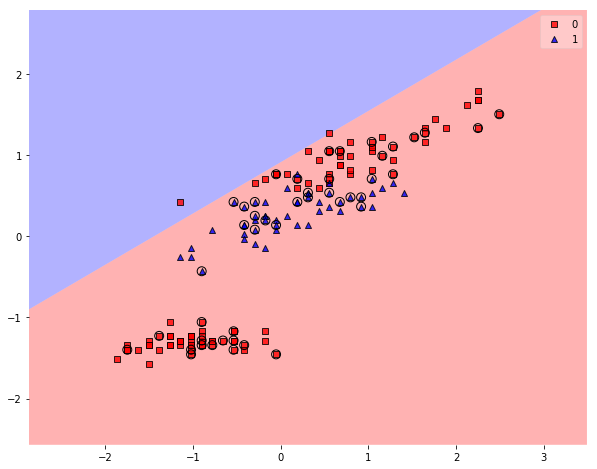

In [84]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X, y, model, X_highlight=X_test)

In [88]:
pd.Series(y_train).value_counts()/len(y_train)

0    0.695238
1    0.304762
dtype: float64

In [89]:
pd.Series(y_test).value_counts()/len(y_test)

0    0.6
1    0.4
dtype: float64

45/45 [==============================] - 0s 57us/step
test accuracy:  0.9555555568801032


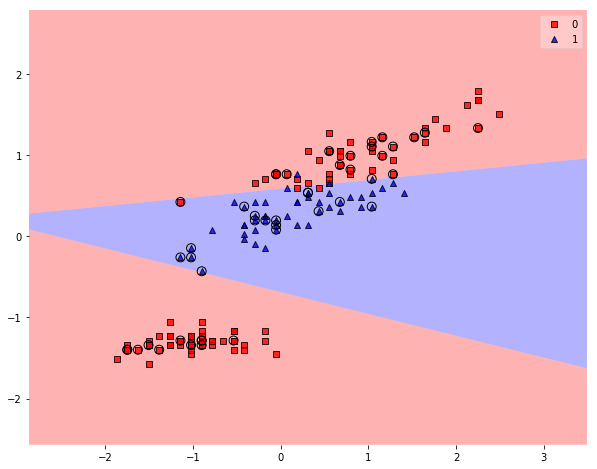

In [106]:
tf.set_random_seed(1)
np.random.seed(1)

tensor_board = keras.callbacks.TensorBoard(log_dir="/tmp/tf/logs/%d" 
                                    % time())

adam = keras.optimizers.Adam(lr = 0.01)

model = keras.Sequential()
model.add(InputLayer((2, )))
model.add(Dense(units=2, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy
            , metrics=["accuracy"], optimizer="adam")
model.fit(X_train, y_train, batch_size=32
          , validation_data = (X_test, y_test)
          , epochs=2000
          , verbose = 0
          , callbacks=[tensor_board])

print("test accuracy: ",  model.evaluate(X_test, y_test)[1])
plt.figure(figsize=(10, 8))
plot_decision_regions(X, y, model, X_highlight=X_test)